In [1]:
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pylab as plt  
from matplotlib.font_manager import FontProperties
from celluloid import Camera # getting the camera
from IPython.display import HTML # to show the animation in Jupyter
import warnings
warnings.simplefilter(action='ignore')
fontP = FontProperties()
fontP.set_size('xx-small')

In [2]:
path = os.getcwd()
figure =  os.path.join(path,'src')

In [3]:
df =  pd.read_csv(os.path.join(path,'train_history_resnet.csv'))

In [4]:
loss =  df['loss']
val_loss  =  df['val_loss']
accuracy =  df['accuracy']
val_accuracy  =  df['val_accuracy']
x =  np.arange(0,100,1)

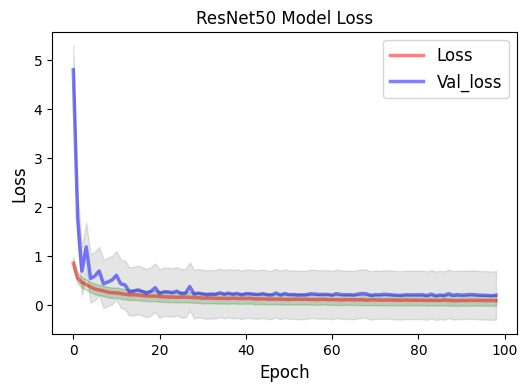

In [5]:
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
l1 =  loss -  np.std(loss)
l2 =  loss + np.std(loss)
lv1 =  val_loss -  np.std(val_loss)
lv2 =  val_loss + np.std(val_loss)
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = loss[:i] # current sine
    xv_t = x[:i] # current dataset
    yv_t = val_loss[:i] # current sine
    ax.plot(x_t, y_t, 'r',color='red', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], l1[:i], l2[:i],color="green",alpha=0.2)
    
    ax.plot(x_t,yv_t, color='blue', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], lv1[:i], lv2[:i],color="black",alpha=0.1)
    ax.set_xlabel("Epoch",fontsize=12)
    ax.set_ylabel("Loss",fontsize=12)
    camera.snap()
plt.legend(['Loss','Val_loss'],fontsize=12)
plt.title("ResNet50 Model Loss",fontsize=12)
animation = camera.animate(blit=False, interval=120)
HTML(animation.to_html5_video())

In [6]:
animation.save(f'{figure}/resnet50_train_val_loss.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [7]:
!ffmpeg -i '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/resnet50_train_val_loss.mp4' -filter:v fps=fps=30 '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/resnet50_train_val_loss.gif'

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/Users

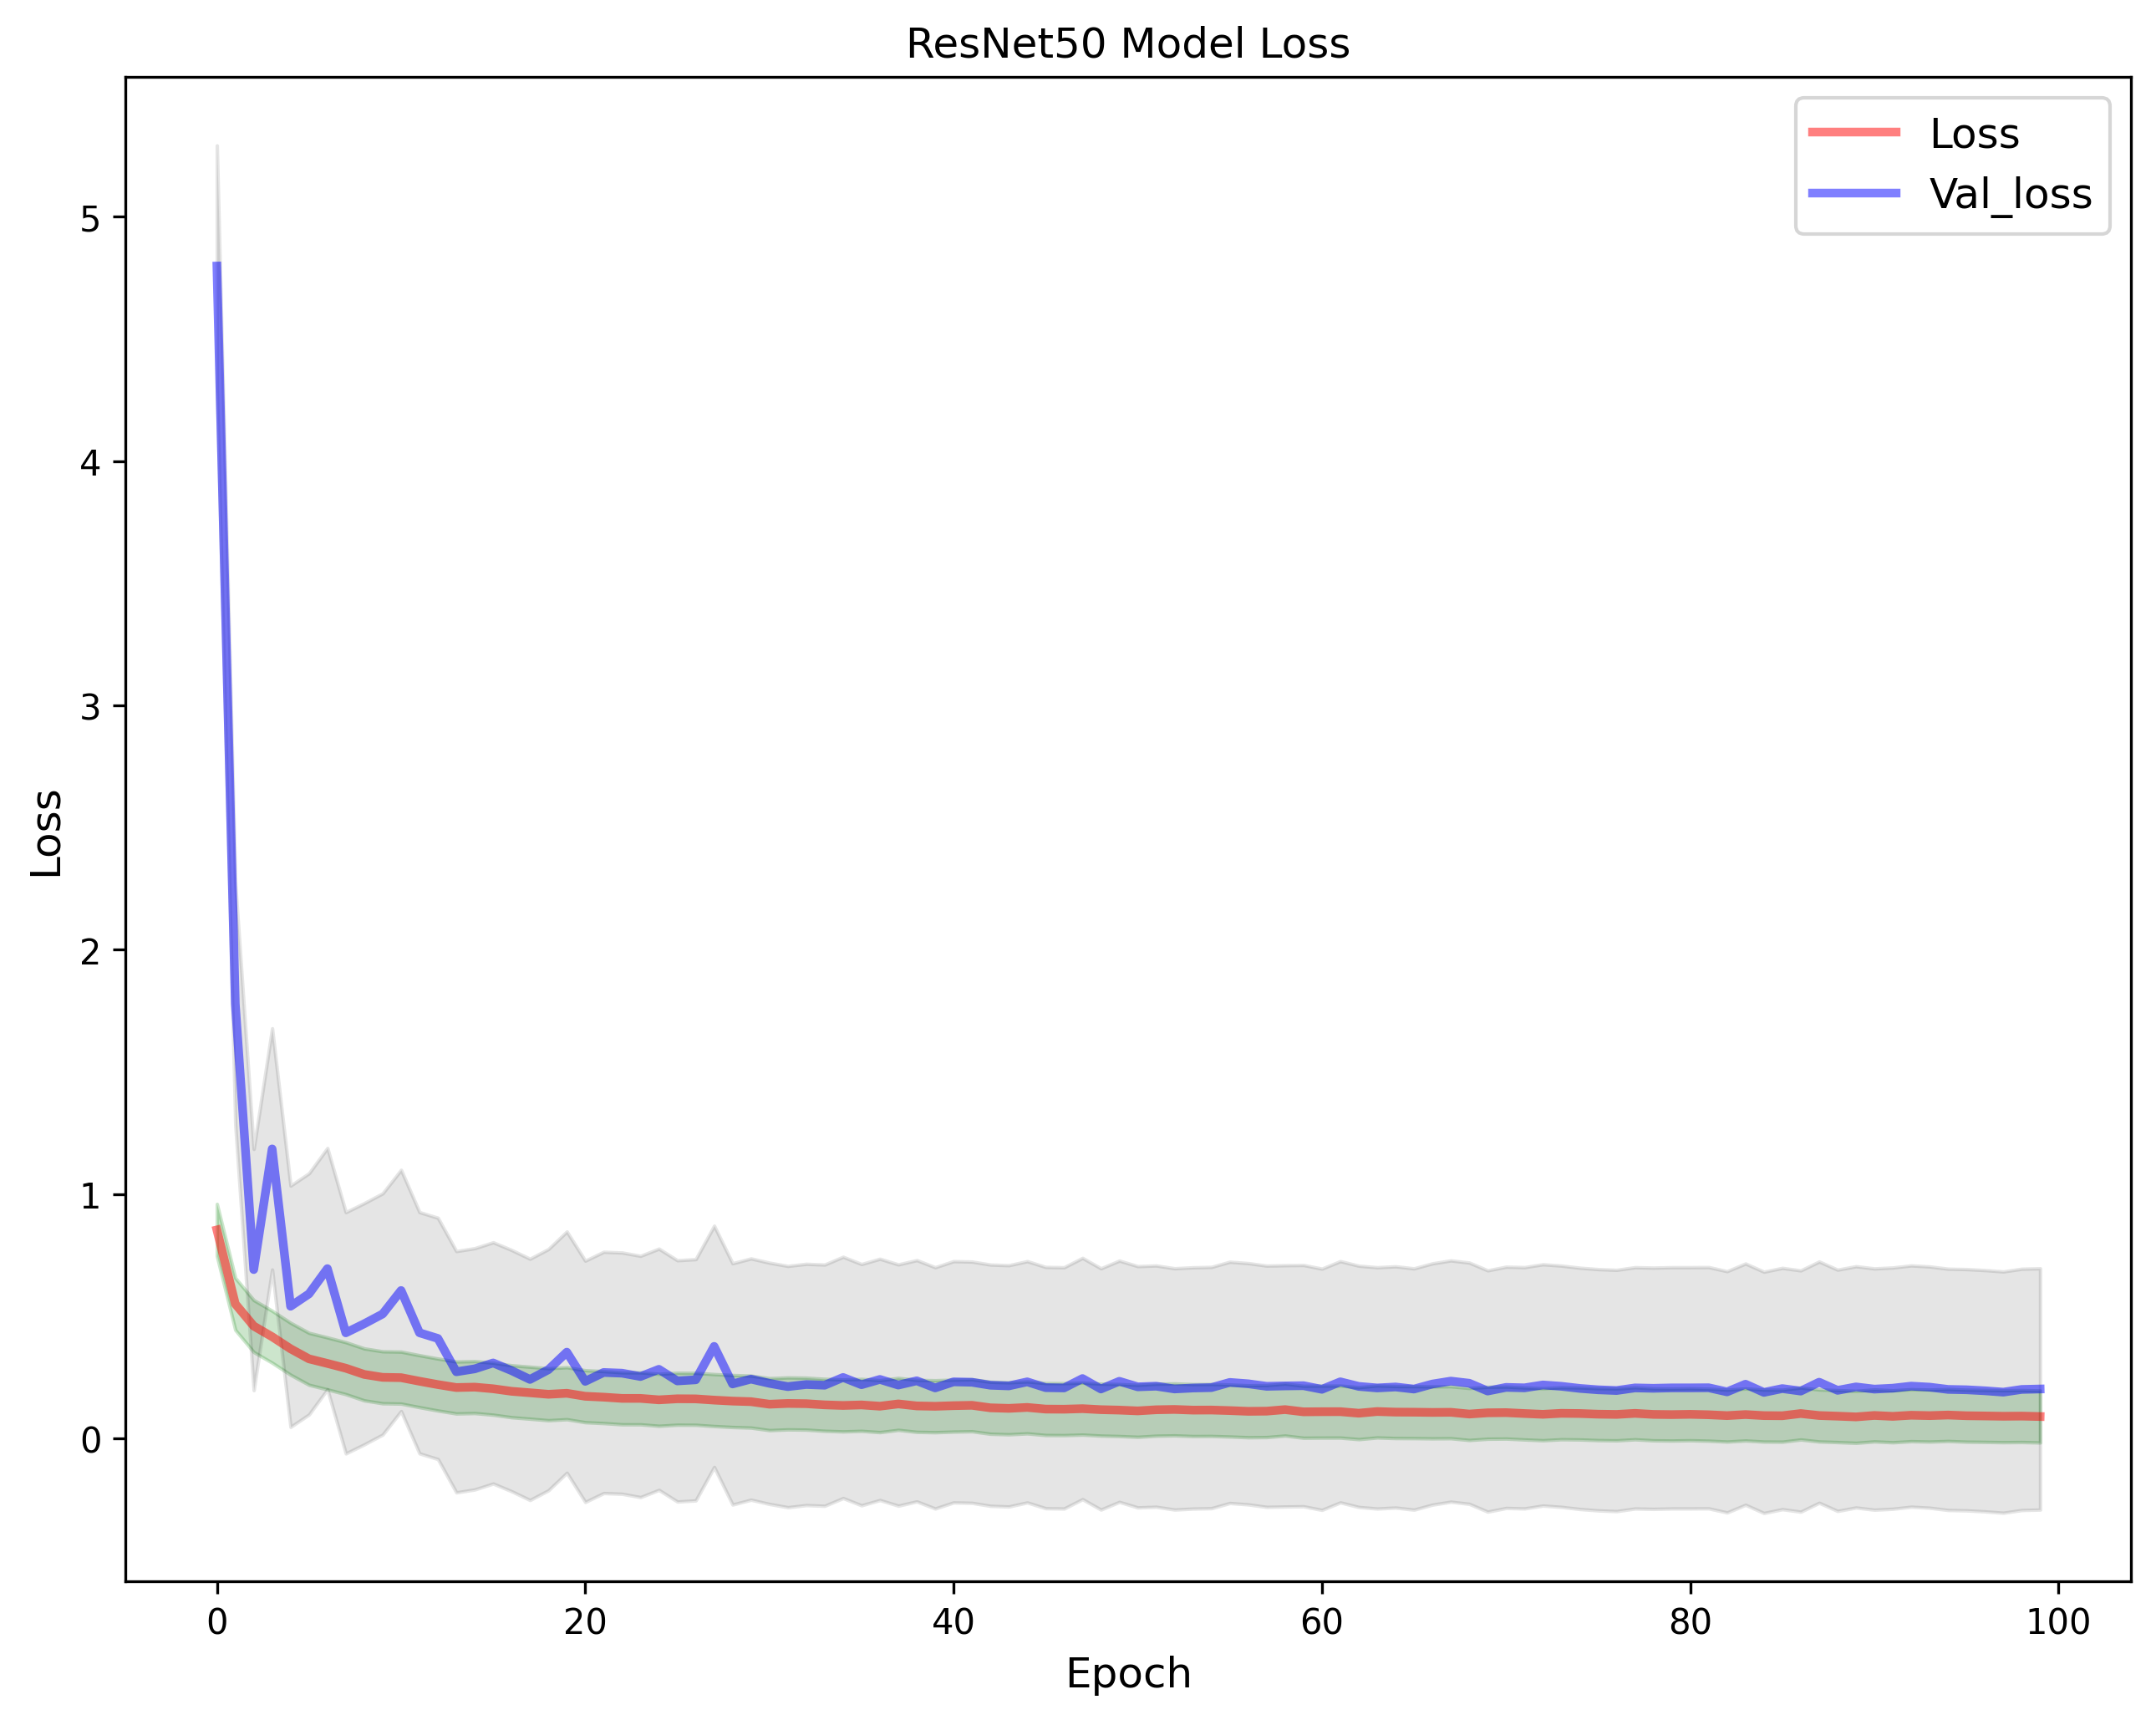

In [8]:
fig= plt.figure(figsize=(8,6),dpi=300)
axes= fig.add_axes([0,0,1,1])
l1 =  loss -  np.std(loss)
l2 =  loss + np.std(loss)
axes.plot(x,loss, color='red', alpha=0.5,linewidth=2.5,)
axes.fill_between(x, l1, l2,color="green",alpha=0.2)
l1 =  val_loss -  np.std(val_loss)
l2 =  val_loss + np.std(val_loss)
axes.plot(x,val_loss, color='blue', alpha=0.5,linewidth=2.5,)
axes.fill_between(x, l1, l2,color="black",alpha=0.1)
axes.set_xlabel("Epoch",fontsize=12)
axes.set_ylabel("Loss",fontsize=12)
plt.legend(['Loss','Val_loss'],fontsize=12)
plt.title("ResNet50 Model Loss",fontsize=12)
# plt.tight_layout()
plt.savefig(f'{figure}/resnet50_train_val_loss.png',bbox_inches='tight', dpi=300)
plt.show()

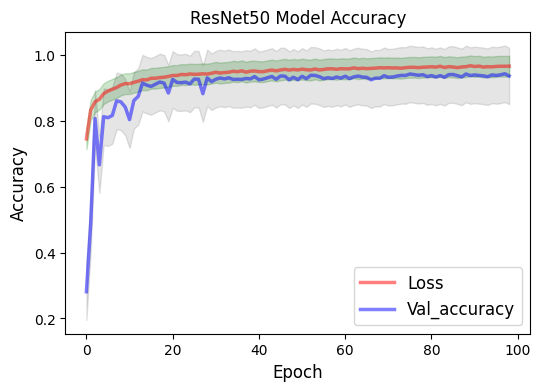

In [9]:
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
a1 =  accuracy -  np.std(accuracy)
a2 =  accuracy + np.std(accuracy)
av1 =  val_accuracy -  np.std(val_accuracy)
av2 =  val_accuracy + np.std(val_accuracy)
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = accuracy[:i] # current sine
    xv_t = x[:i] # current dataset
    yv_t = val_accuracy[:i] # current sine
    ax.plot(x_t, y_t, 'r',color='red', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], a1[:i], a2[:i],color="green",alpha=0.2)
    
    ax.plot(x_t,yv_t, color='blue', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], av1[:i], av2[:i],color="black",alpha=0.1)
    ax.set_xlabel("Epoch",fontsize=12)
    ax.set_ylabel("Accuracy",fontsize=12)
    camera.snap()
plt.legend(['Loss','Val_accuracy'],fontsize=12)
plt.title("ResNet50 Model Accuracy",fontsize=12)
animation = camera.animate(blit=False, interval=120)
HTML(animation.to_html5_video())

In [10]:
animation.save(f'{figure}/resnet50_train_val_accuracy.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [11]:
!ffmpeg -i '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/resnet50_train_val_accuracy.mp4' -filter:v fps=fps=30 '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/resnet50_train_val_accuracy.gif'

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/Users

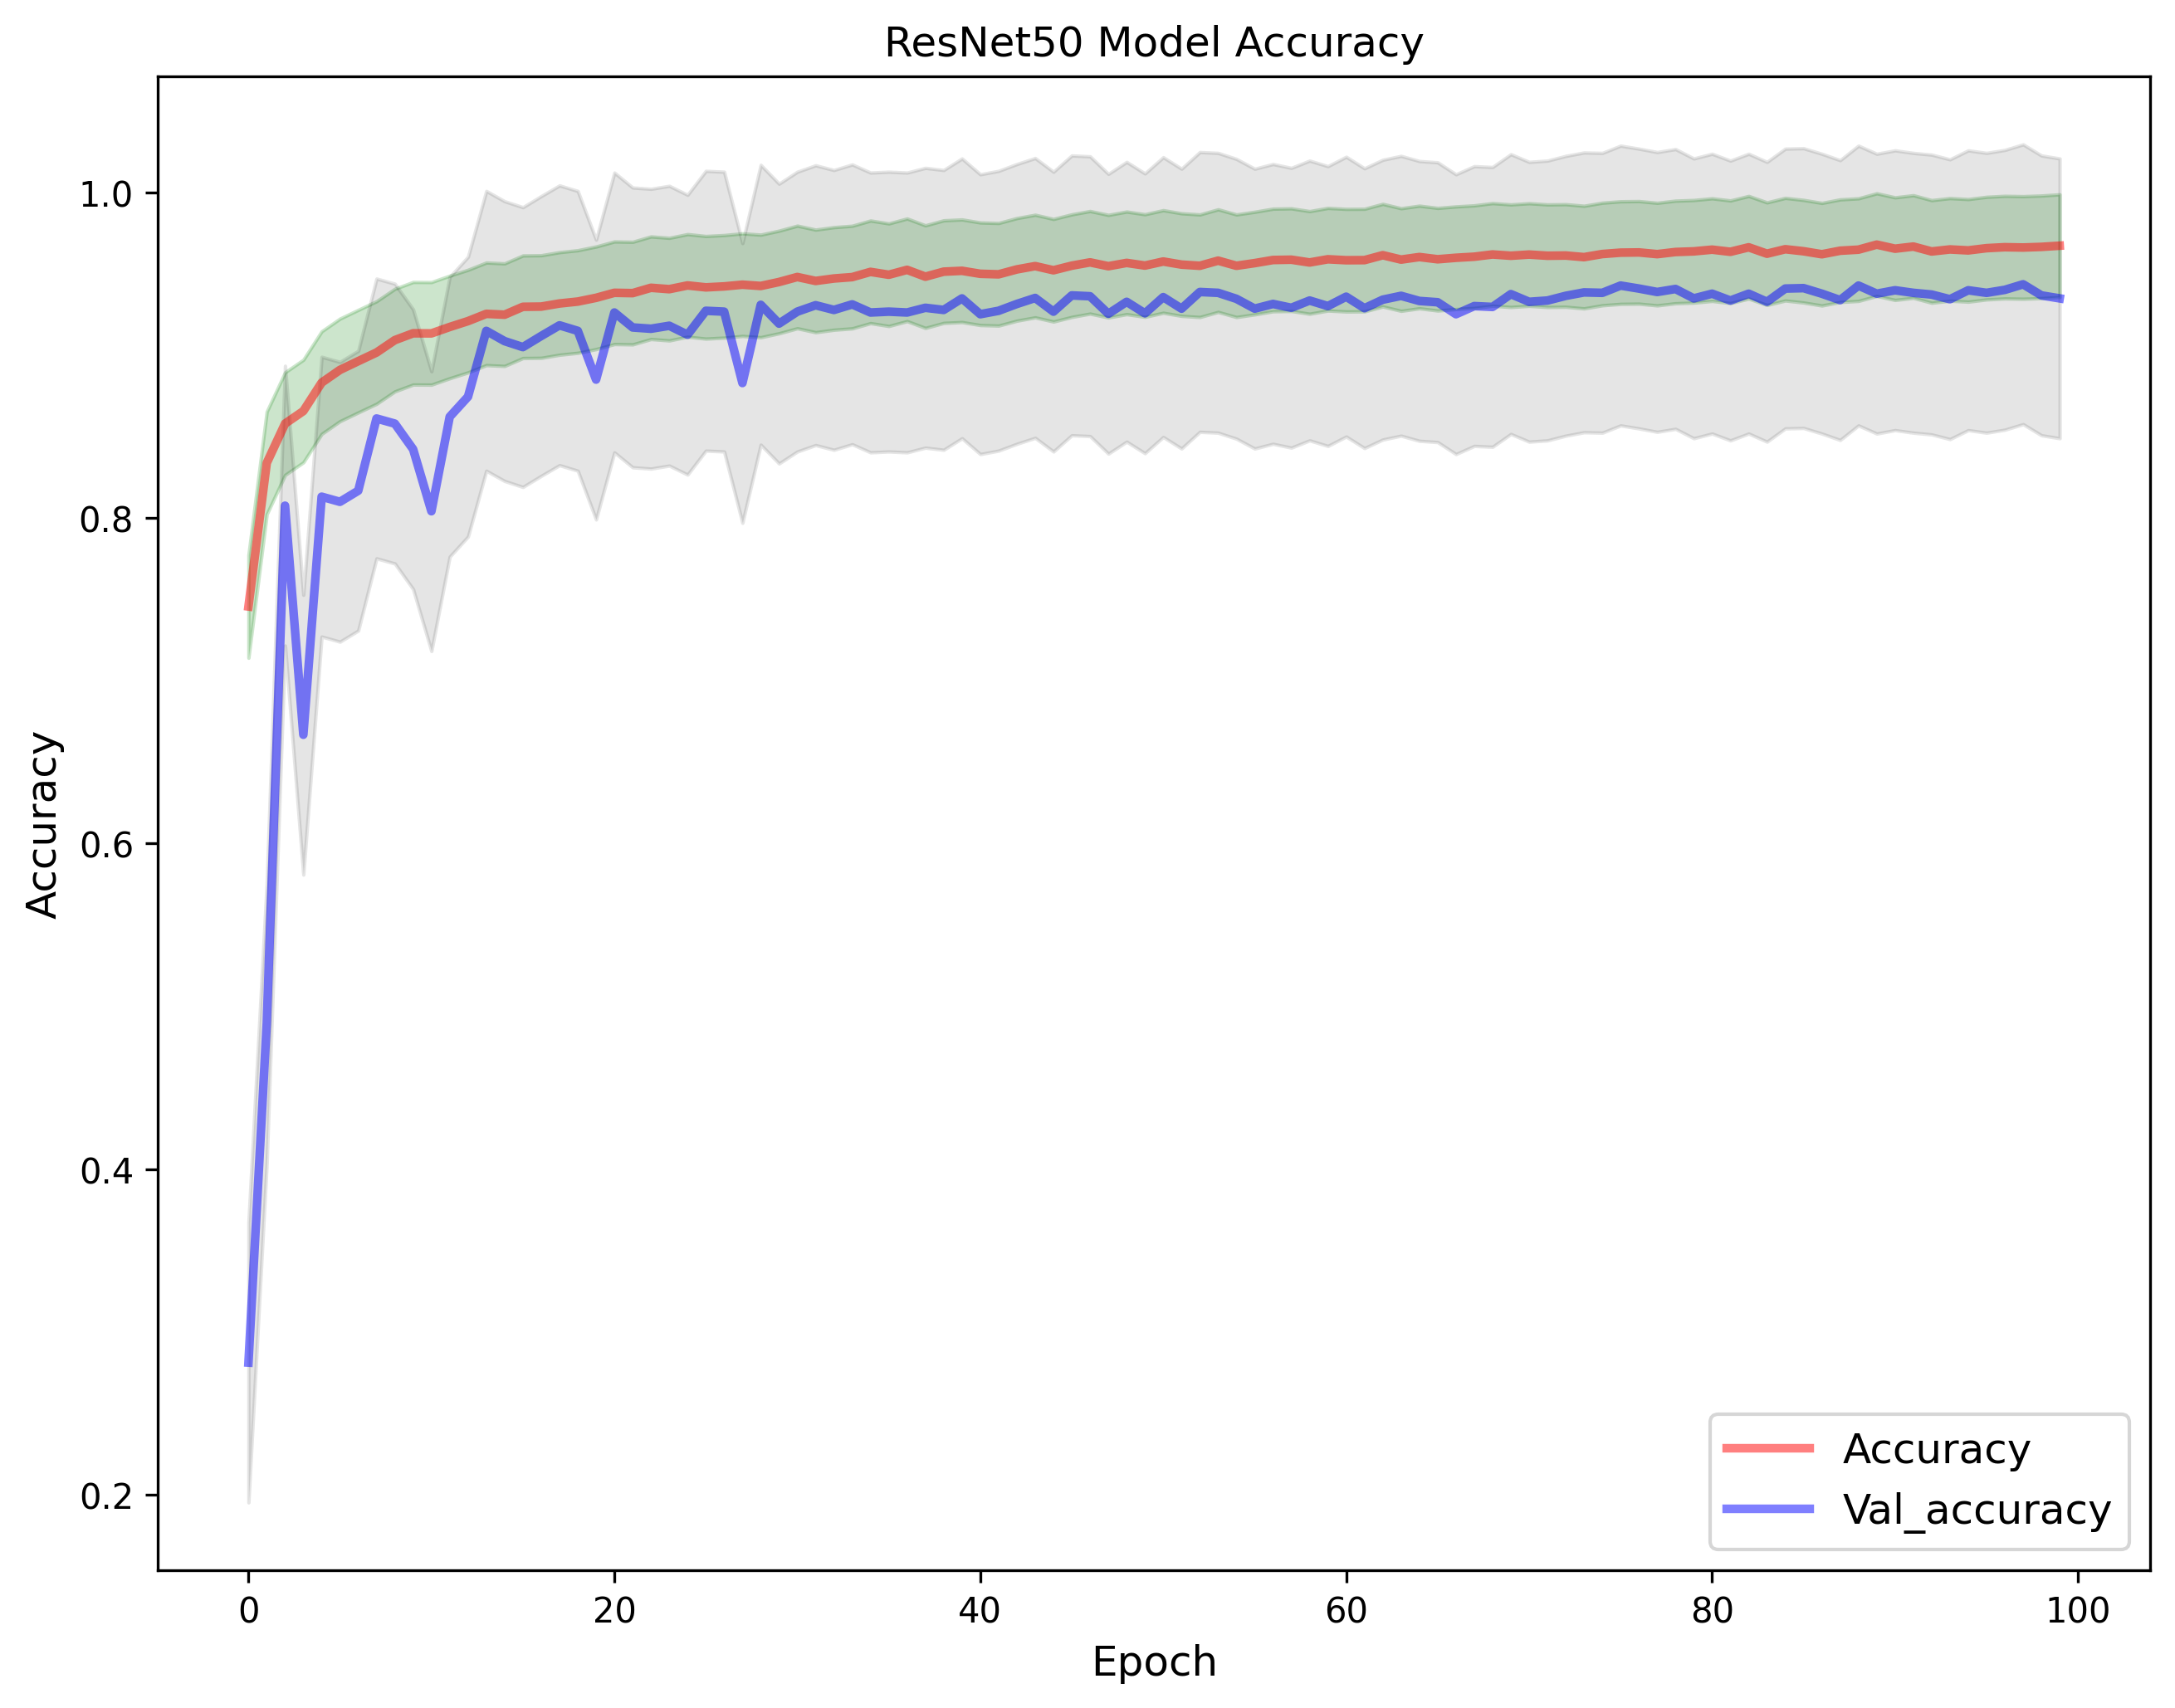

In [12]:
fig= plt.figure(figsize=(8,6),dpi=300)
axes= fig.add_axes([0,0,1,1])
a1 =  accuracy -  np.std(accuracy)
a2 =  accuracy + np.std(accuracy)
axes.plot(x,accuracy, color='red', alpha=0.5,linewidth=2.5)
axes.fill_between(x, a1, a2,color="green",alpha=0.2)
a1 =  val_accuracy -  np.std(val_accuracy)
a2 =  val_accuracy + np.std(val_accuracy)
axes.plot(x,val_accuracy, color='blue', alpha=0.5,linewidth=2.5)
axes.fill_between(x, a1, a2,color="black",alpha=0.1)
axes.set_xlabel("Epoch",fontsize=12)
axes.set_ylabel("Accuracy",fontsize=12)
# plt.legend(['Accuracy','Val_accuracy'], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(['Accuracy','Val_accuracy'],fontsize=12,loc='lower right')
plt.title("ResNet50 Model Accuracy",fontsize=12)
plt.savefig(f'{figure}/resnet50_train_val_accuracy.png',bbox_inches='tight', dpi=300)
plt.show()

In [13]:
df =  pd.read_csv(os.path.join(path,'train_history_vgg.csv'))

In [14]:
loss =  df['loss']
val_loss  =  df['val_loss']
accuracy =  df['accuracy']
val_accuracy  =  df['val_accuracy']
x =  np.arange(0,50,1)

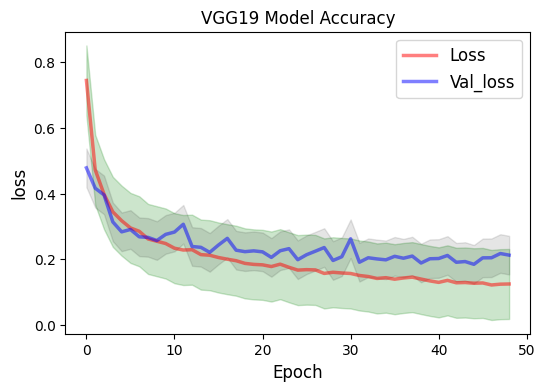

In [15]:
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
l1 =  loss -  np.std(loss)
l2 =  loss + np.std(loss)
lv1 =  val_loss -  np.std(val_loss)
lv2 =  val_loss + np.std(val_loss)
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = loss[:i] # current sine
    xv_t = x[:i] # current dataset
    yv_t = val_loss[:i] # current sine
    ax.plot(x_t, y_t, 'r',color='red', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], l1[:i], l2[:i],color="green",alpha=0.2)
    
    ax.plot(x_t,yv_t, color='blue', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], lv1[:i], lv2[:i],color="black",alpha=0.1)
    ax.set_xlabel("Epoch",fontsize=12)
    ax.set_ylabel("loss",fontsize=12)
    camera.snap()
plt.legend(['Loss','Val_loss'],fontsize=12)
plt.title("VGG19 Model Accuracy",fontsize=12)
animation = camera.animate(blit=False, interval=120)
HTML(animation.to_html5_video())

In [16]:
animation.save(f'{figure}/vgg19_train_val_loss.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [17]:
!ffmpeg -i '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/vgg19_train_val_loss.mp4' -filter:v fps=fps=30 '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/vgg19_train_val_loss.gif'

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/Users

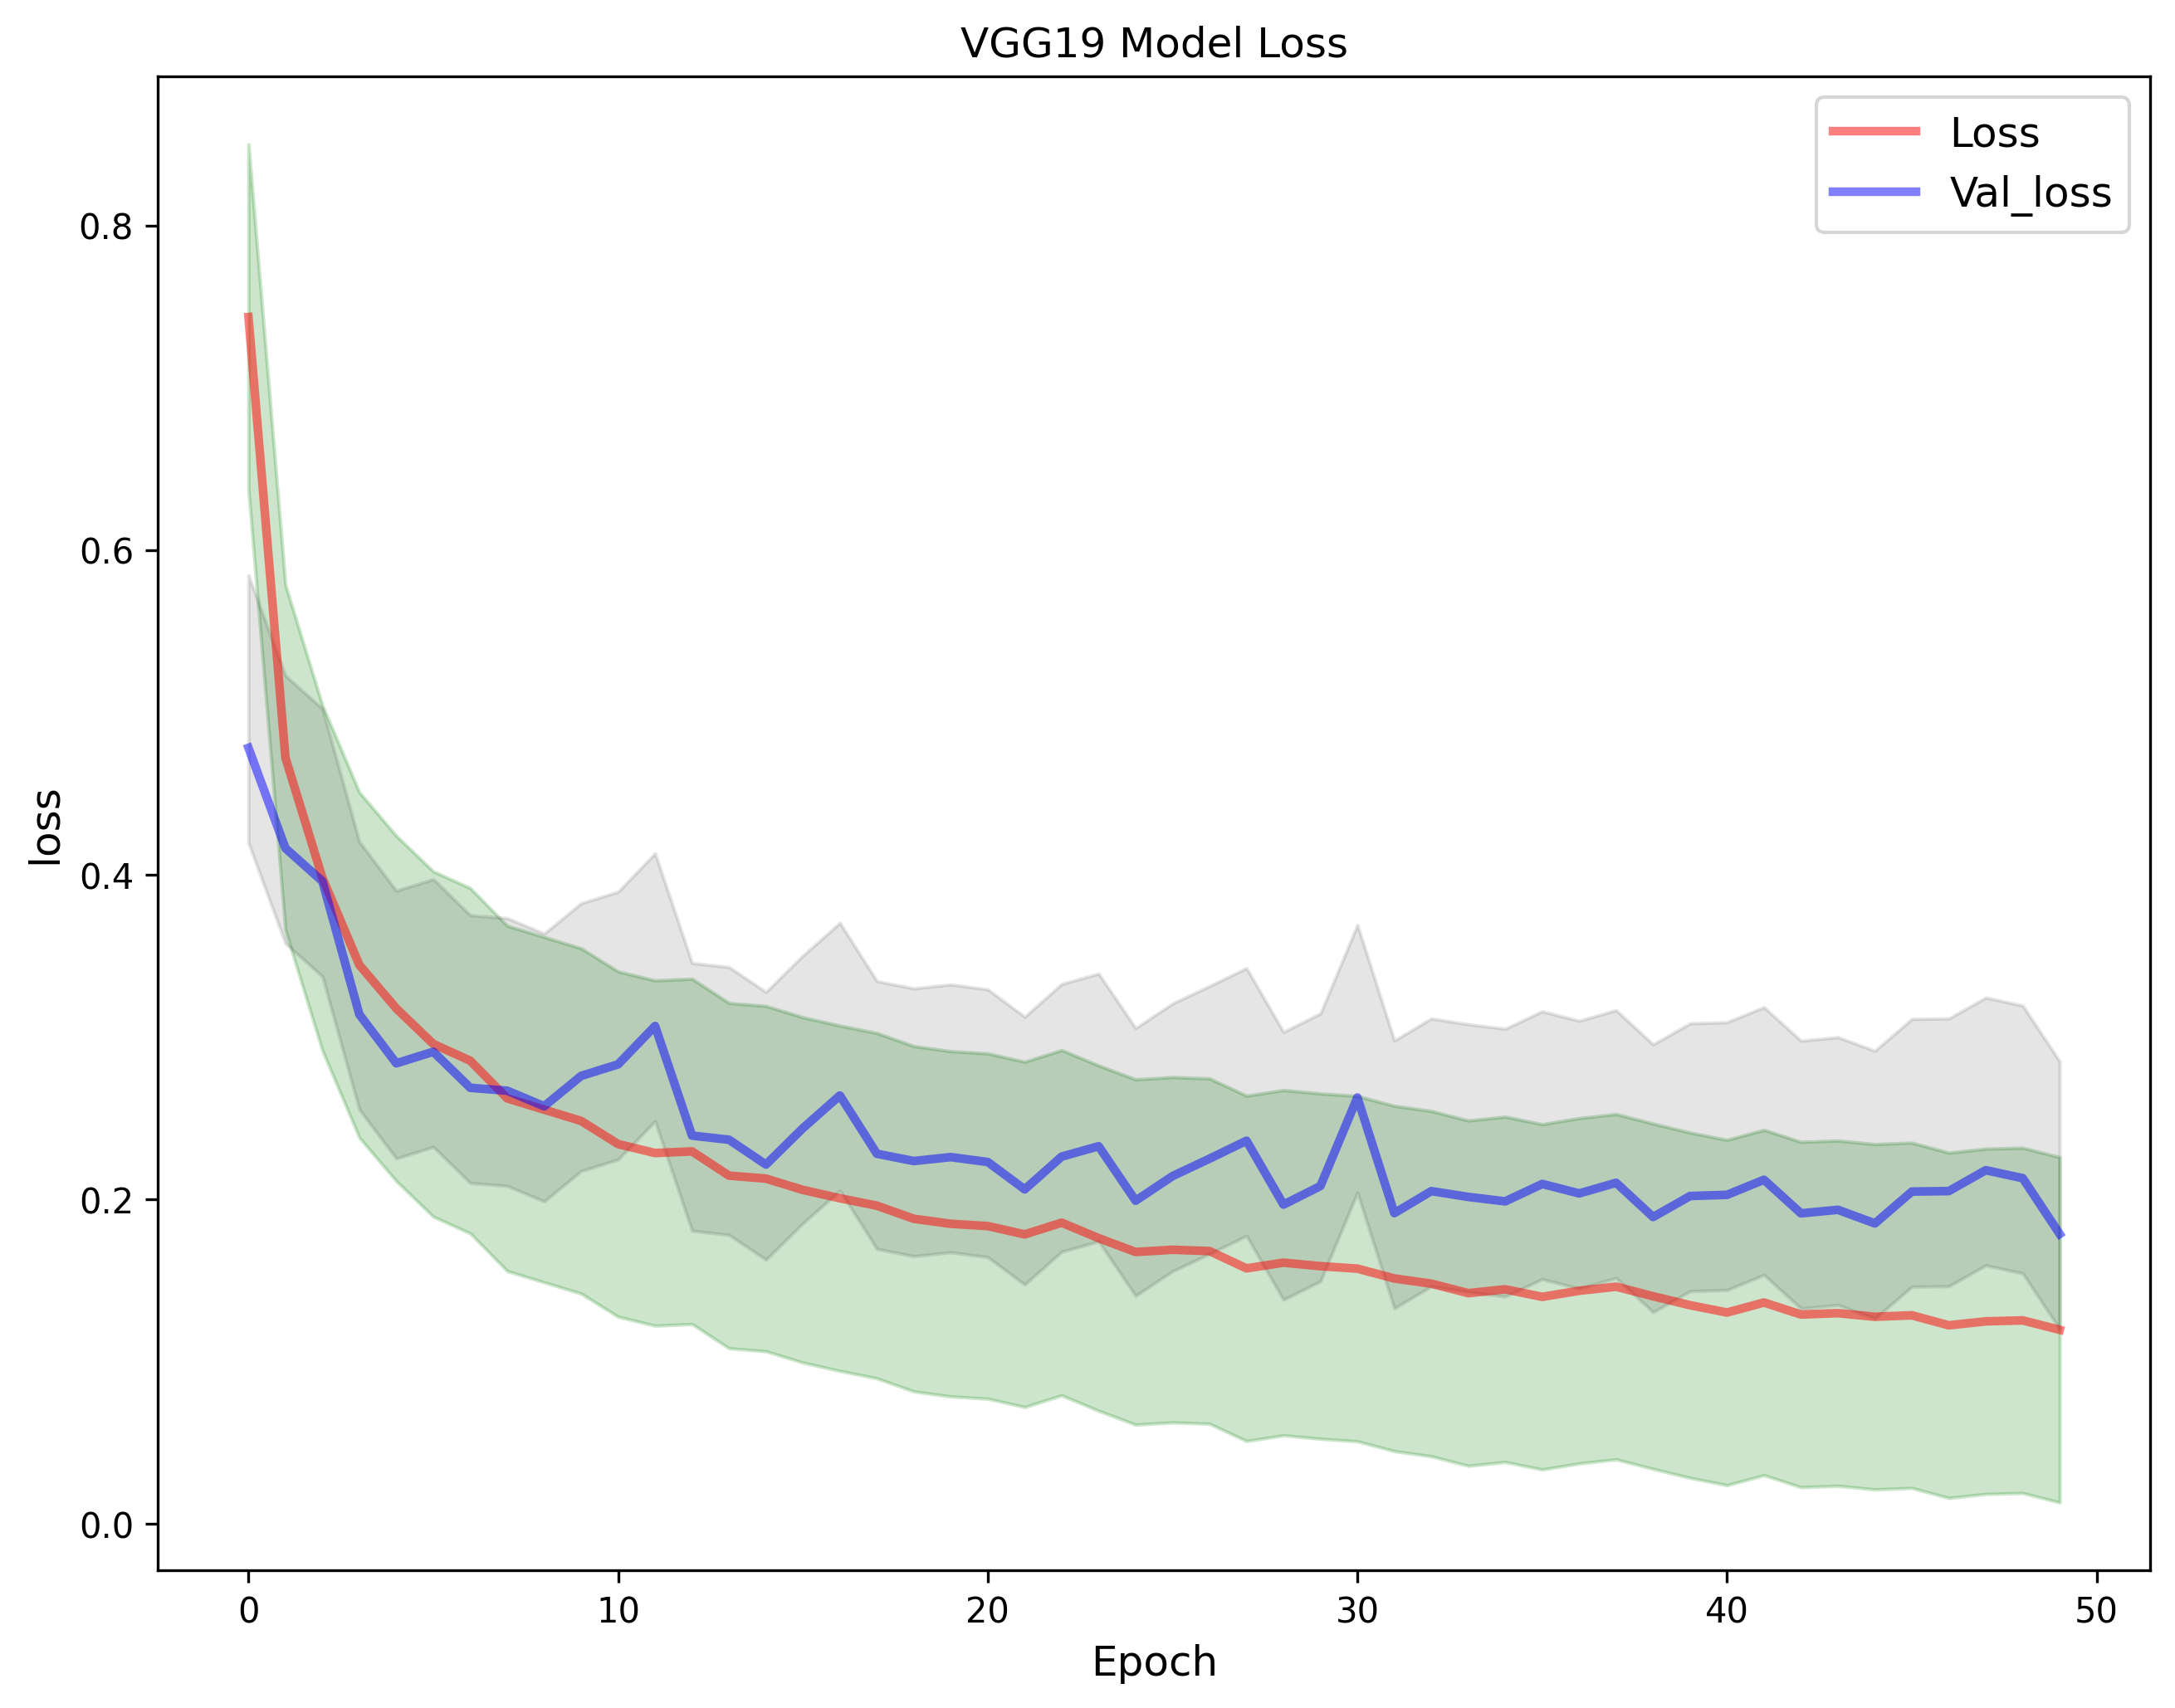

In [18]:
fig= plt.figure(figsize=(8,6),dpi=300)
axes= fig.add_axes([0,0,1,1])
l1 =  loss -  np.std(loss)
l2 =  loss + np.std(loss)
axes.plot(x,loss, color='red', alpha=0.5,linewidth=2.5,label="Sin(x)+Noise")
axes.fill_between(x, l1, l2,color="green",alpha=0.2)
l1 =  val_loss -  np.std(val_loss)
l2 =  val_loss + np.std(loss)
axes.plot(x,val_loss, color='blue', alpha=0.5,linewidth=2.5,label="Sin(x)+Noise")
axes.fill_between(x, l1, l2,color="black",alpha=0.1)
axes.set_xlabel("Epoch",fontsize=12)
axes.set_ylabel("loss",fontsize=12)
plt.legend(['Loss','Val_loss'],fontsize=12)
plt.title("VGG19 Model Loss",fontsize=12)
plt.savefig(f'{figure}/vgg19_train_val_loss.png',bbox_inches='tight', dpi=300)
plt.show()

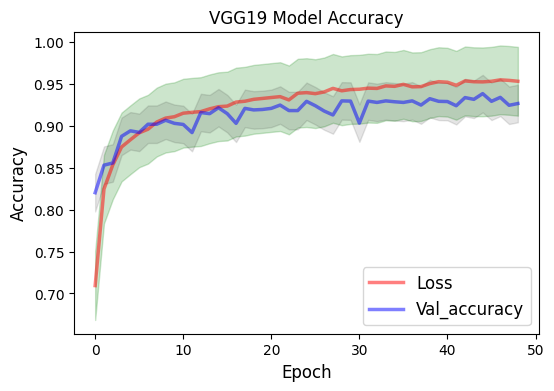

In [19]:
fig, ax = plt.subplots(dpi=100) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
a1 =  accuracy -  np.std(accuracy)
a2 =  accuracy + np.std(accuracy)
av1 =  val_accuracy -  np.std(val_accuracy)
av2 =  val_accuracy + np.std(val_accuracy)
for i in range(len(x)):
    x_t = x[:i] # current dataset
    y_t = accuracy[:i] # current sine
    xv_t = x[:i] # current dataset
    yv_t = val_accuracy[:i] # current sine
    ax.plot(x_t, y_t, 'r',color='red', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], a1[:i], a2[:i],color="green",alpha=0.2)
    
    ax.plot(x_t,yv_t, color='blue', alpha=0.5,linewidth=2.5,)
    ax.fill_between(x[:i], av1[:i], av2[:i],color="black",alpha=0.1)
    ax.set_xlabel("Epoch",fontsize=12)
    ax.set_ylabel("Accuracy",fontsize=12)
    camera.snap()
plt.legend(['Loss','Val_accuracy'],fontsize=12,loc='lower right')
plt.title("VGG19 Model Accuracy",fontsize=12)
animation = camera.animate(blit=False, interval=120)
HTML(animation.to_html5_video())

In [20]:
animation.save(f'{figure}/vgg19_train_val_accuracy.mp4',
               dpi=300,
               savefig_kwargs={
                   'frameon': False,
                   'pad_inches': 'tight'
               }
              )

In [21]:
!ffmpeg -i '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/vgg19_train_val_accuracy.mp4' -filter:v fps=fps=30 '/Users/yusuf/Desktop/AIMS/Research/Lab/Experiments/Essay/src/vgg19_train_val_accuracy.gif'

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/anaconda3 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/Users

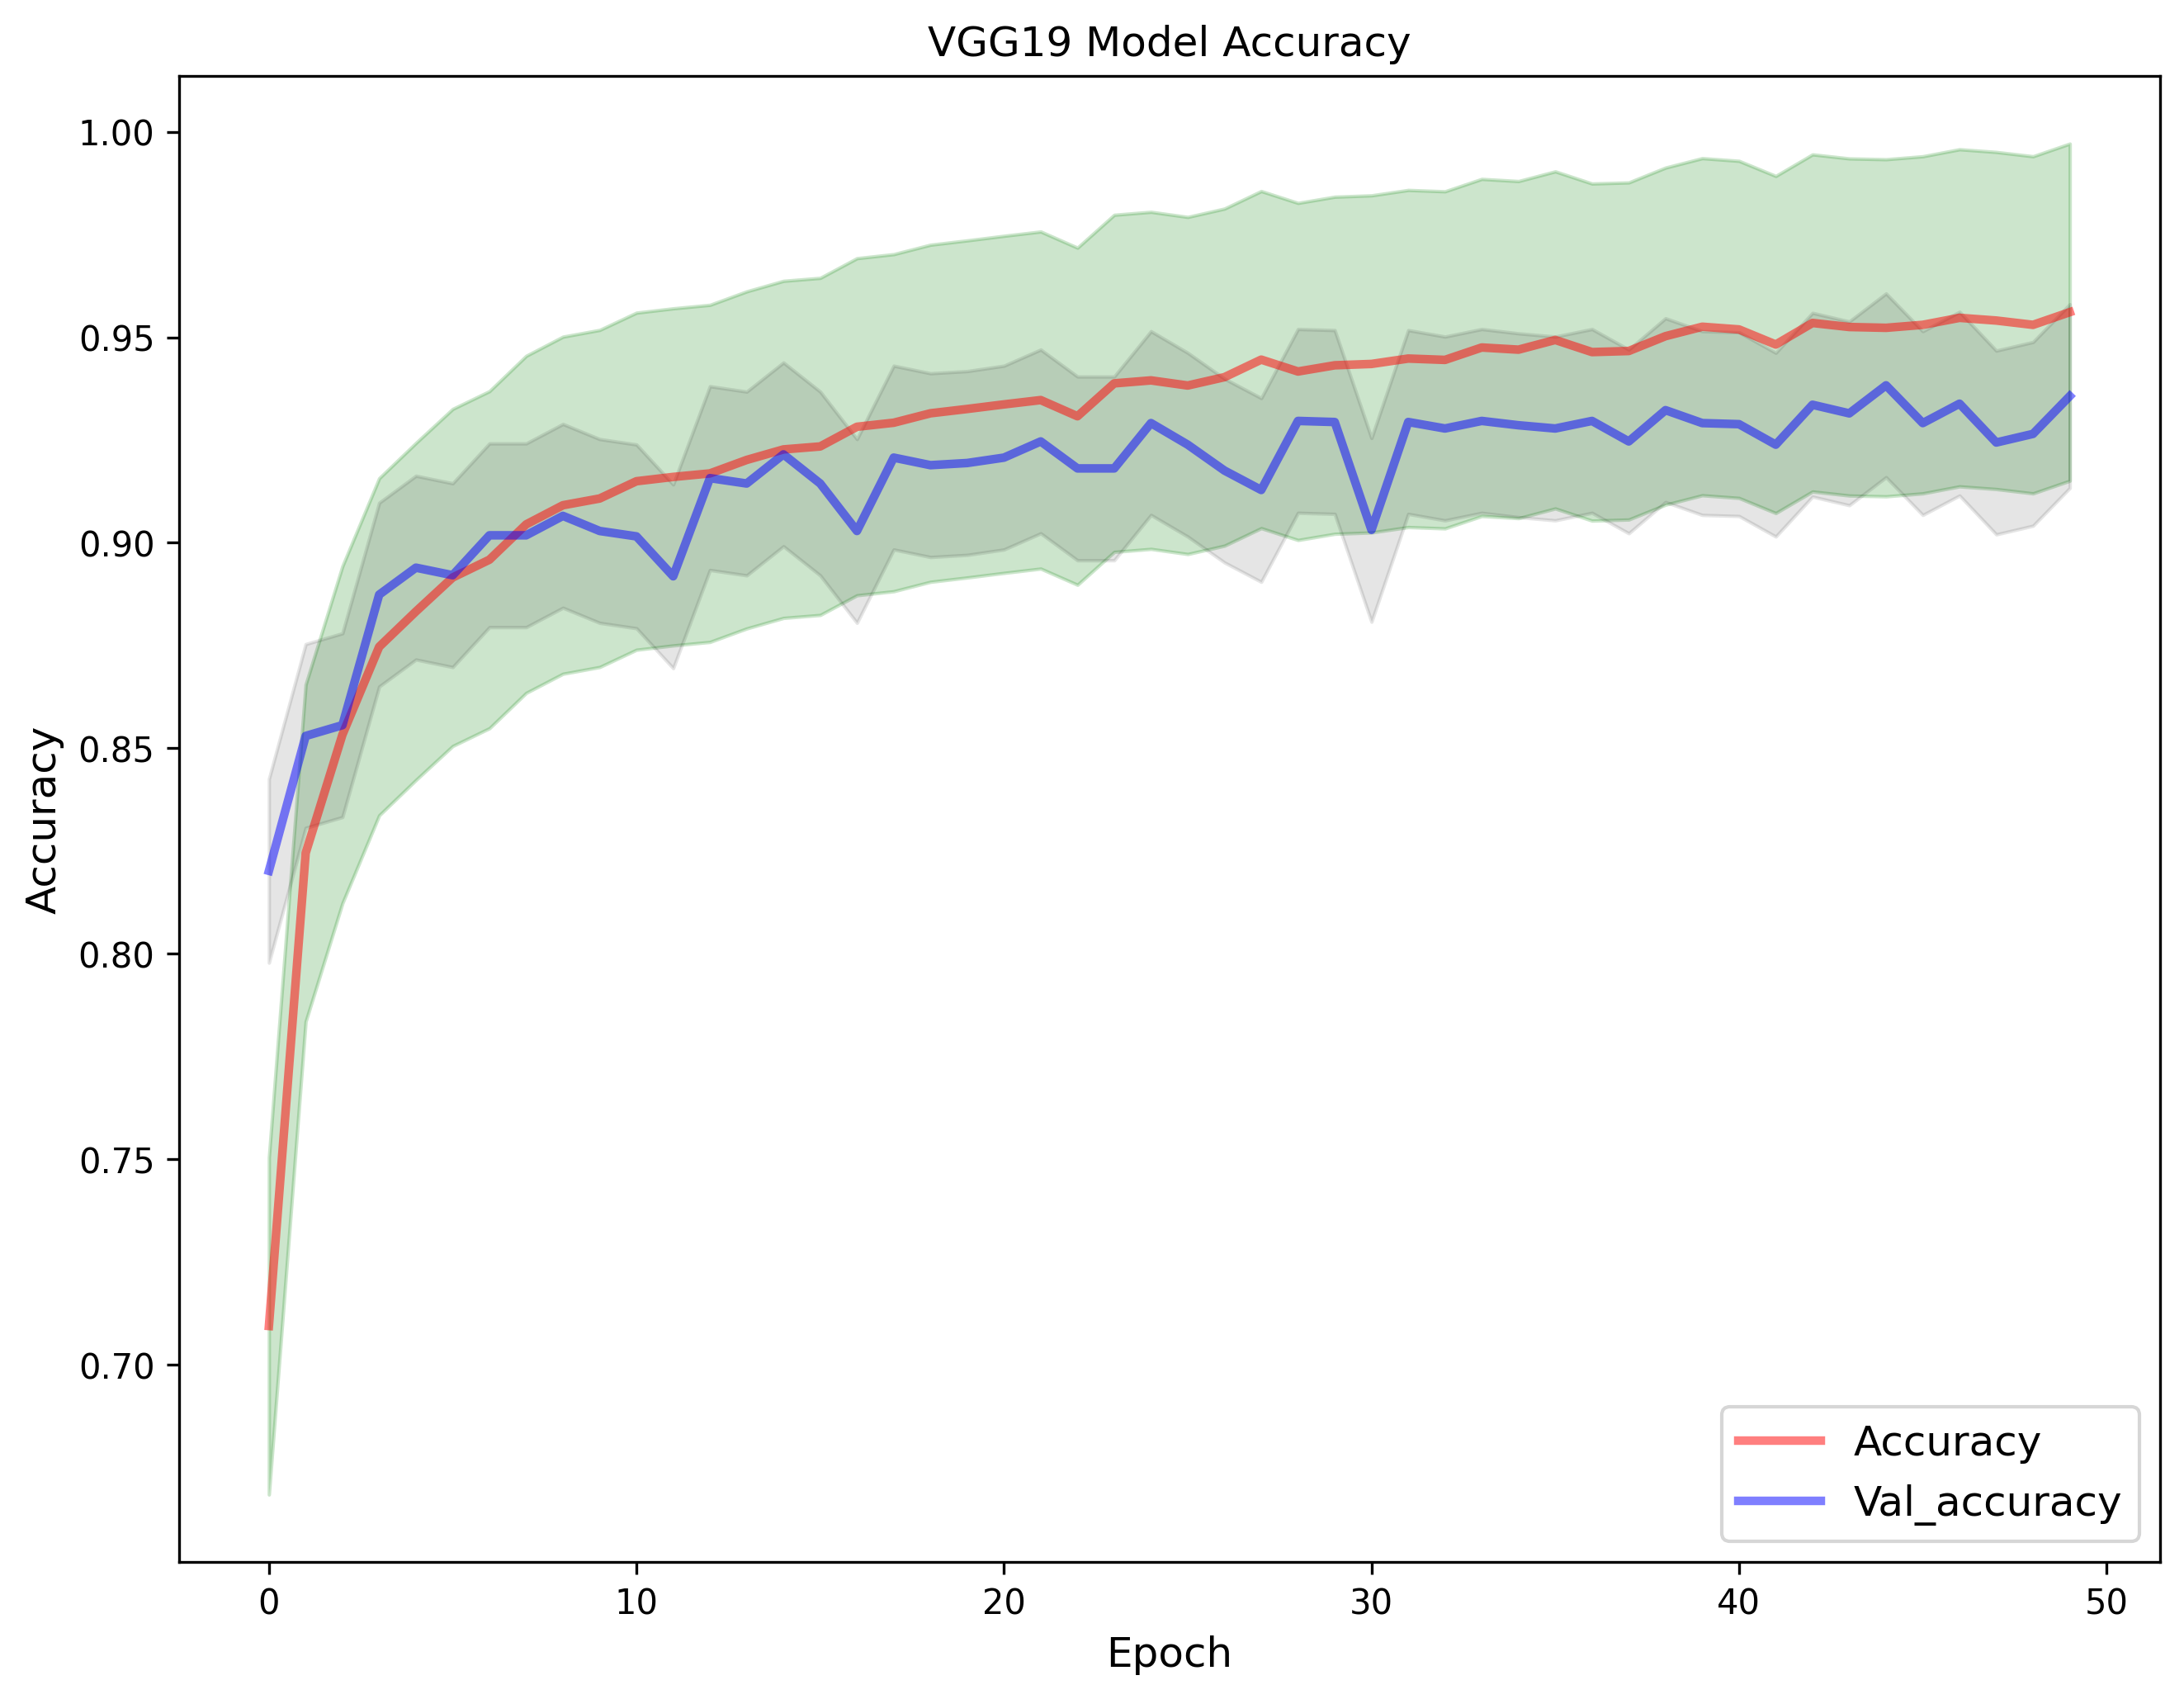

In [22]:
fig= plt.figure(figsize=(8,6),dpi=300)
axes= fig.add_axes([0,0,1,1])
a1 =  accuracy -  np.std(accuracy)
a2 =  accuracy + np.std(accuracy)
p1  = axes.plot(x,accuracy, color='red', alpha=0.5,linewidth=2.5)
axes.fill_between(x, a1, a2,color="green",alpha=0.2)
a1 =  val_accuracy -  np.std(val_accuracy)
a2 =  val_accuracy + np.std(val_accuracy)
p2  = axes.plot(x,val_accuracy, color='blue', alpha=0.5,linewidth=2.5)
axes.fill_between(x, a1, a2,color="black",alpha=0.1)
axes.set_xlabel("Epoch",fontsize=12)
axes.set_ylabel("Accuracy",fontsize=12)

# plt.legend(['Accuracy','Val_accuracy'], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(['Accuracy','Val_accuracy'],fontsize=12,loc='lower right')
axes.set_title("VGG19 Model Accuracy",fontsize=12)
plt.savefig(f'{figure}/vgg19_train_val_accuracy.png',bbox_inches='tight', dpi=300)
plt.show()